In [13]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np


def rotation_matrix(rad):
    c,s = np.cos(rad), np.sin(rad)
    return np.array([[c,-s], [s, c]])

def drift_points(shape=(10,10), drift_angle = 0, drift_strength=1e-4):
    lenY, lenX = shape
    drift_vector = (rotation_matrix(drift_angle) @ [0,1]) * drift_strength
    arr = np.zeros((lenY, lenX, 2))
    drift = np.zeros(2)
    corners = []
    for yi in range(lenY):
        for xi in range(lenX):
            drift += drift_vector
            position = np.array((yi, xi))
            arr[yi, xi] = position + drift
            if (yi == 0 or yi == (lenY-1)) and (xi == 0 or xi == (lenX-1)):
                corner = np.array((yi, xi)) + drift
                corners.append(corner)
    return arr#, corners

In [14]:
def plot(points, ax, lim=((),())):
    points = points.reshape((-1, 2))
    for xy in points:
        rect = plt.Rectangle(xy-0.25, 0.5, 0.5)
        ax.add_patch(rect)
    xmin, ymin = points.min(0) - 2
    xmax, ymax = points.max(0) + 3
    if lim == ((),()):
        ax.set_xlim(xmin, xmax)
        ax.set_ylim(ymax, ymin)
    else:
        ax.set_xlim(lim[0])
        ax.set_ylim(lim[1])  
        
def extend_3D_ones(arr_of_2d):
    return np.hstack([arr_of_2d, np.ones((len(arr_of_2d),1))])
    
def get_matrix(xy, xyprime):
    xy = extend_3D_ones(xy)
    xyprime = extend_3D_ones(xyprime)
    T, *_ = np.linalg.lstsq(xy, xyprime, rcond=None)
    return T.T

def transform_points(points, transform):
    points = extend_3D_ones(points)
    points_prime = points @ transform.T
    return points_prime[:, :2]

In [15]:
from matplotlib.transforms import Affine2D

ValueError: 

<Figure size 432x288 with 0 Axes>

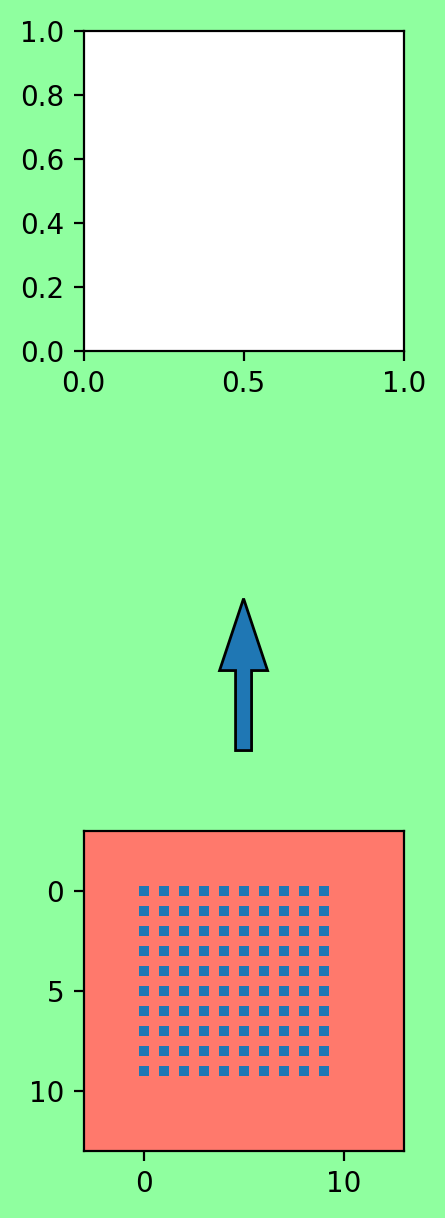

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.close('all')
fig = plt.figure()


fig = plt.figure(figsize=(8, 8), dpi=200)
fig.patch.set_facecolor('xkcd:mint green')

#fig.subplots_adjust(wspace=0.3, left=0.05, right=0.95)

r = 1
strength = 0.04
shape = (10, 10)

height = 0.2
width = 0.2

ax = fig.add_axes((r/2 - width/2, r/2-height/2, width, height))
img0 = drift_points(shape = shape, drift_strength=0)
mn = img0.reshape((-1, 2)).min(0) - 3
mx = img0.reshape((-1, 2)).max(0) + 4
lim = ((mn[0], mx[0]), (mx[1], mn[1]))
plot(img0, ax, lim = lim)
#ax.axis('off')
ax.set_facecolor('xkcd:salmon')

for i, angle in enumerate(np.linspace(0, 2*np.pi, 12, endpoint=Fals
                                      e)):
    left =   r*np.sin(angle) / 2 + r/2
    bottom = r*np.cos(angle) / 2 + r/2
    
    arrstartx = 0.3*np.sin(angle) / 2 + r/2
    arrstarty = 0.3*np.cos(angle) / 2 + r/2
    
    arrendx = 0.4*np.sin(angle) / 2 + r/2
    arrendy = 0.4*np.cos(angle) / 2 + r/2

    arrow = mpl.patches.FancyArrow(
        arrstartx, arrstarty, 
        arrendx - arrstartx, 
        arrendy - arrstarty, 
        transform=fig.transFigure, 
        figure=fig,
        width=0.01
    
    )

    fig.add_artist(arrow)
    
    ax = fig.add_axes((left-width/2, bottom-height/2, width, height))
    img = drift_points(shape=shape, drift_angle=angle, drift_strength=strength)
    M = get_matrix(img0.reshape((-1, 2)), img.reshape((-1, 2)))
    raise ValueError()
    points = transform_points(img0.reshape((-1,2)), M)
    plot(points, ax, lim=lim)#((-5, 20), (-5, 20)))
    #ax.axis('off')
    ax.set_facecolor('xkcd:salmon')


In [113]:
from ipywidgets import Output, HBox

In [134]:
strength = 0.1
deg = 45
angle = np.deg2rad(deg)

o1, o2, o3, o4 = Output(), Output(), Output(), Output()

def transform_from_angle_strength(angle, strength):
    arr = np.eye(3)
    arr[0,0] = 1 - 10*strength*np.sin(angle)
    arr[1,0] = 10*strength*np.cos(angle)
    arr[1,1] = 1 + strength*np.cos(angle)
    arr[1,2] = strength*np.cos(angle)
    arr[0,1] = -np.sin(angle)*strength
    arr[0,2] = -np.sin(angle)*strength
    return arr

img = drift_points(shape=shape, drift_angle=angle, drift_strength=strength)
M = get_matrix(img0.reshape((-1, 2)), img.reshape((-1, 2)))
m = transform_from_angle_strength(angle, strength)
with o1:
    print(np.round(M, 4))
with o2: 
    print(np.round(m ,4))

print()
angle = np.deg2rad(deg + 90)

img = drift_points(shape=shape, drift_angle=angle, drift_strength=strength)
M = get_matrix(img0.reshape((-1, 2)), img.reshape((-1, 2)))
m = transform_from_angle_strength(angle, strength)
with o3:
    print(np.round(M, 4))
with o4: 
    print(np.round(m ,4))
    
display(HBox([o1, o2]))
display(HBox([o3, o4]))

In [222]:
a =np.column_stack([angles, angles])

In [223]:
angle_diff = 90
a[:,1] += angle_diff

In [235]:
np.column_stack([1,1])

(1, 2)

In [254]:
strengths = np.linspace(0, 0.01, 11)
angles = np.linspace(0, 360, 10, endpoint=False)
angles = np.deg2rad(angles)

def transform_from_angle_strength(strength, angle, angle_diff=np.pi/2):
    arr = np.zeros(np.shape(strength) + np.shape(angle) + (2,) + (3,3))
    if np.shape(strength):
        strength = strength[:, None, None]
    angle = np.column_stack([angle, angle])
    angle[:,1] += angle_diff
    arr[...] = np.eye(3)
    s_sin = strength*np.sin(angle)
    s_cos = strength*np.cos(angle)
    arr[..., 0,0] = 1 - 10*s_sin
    arr[..., 1,0] = 10*s_cos
    arr[..., 1,1] = 1 + s_cos
    arr[..., 1,2] = s_cos
    arr[..., 0,1] = -s_sin
    arr[..., 0,2] = -s_sin
    
    return arr.squeeze()

T = transform_from_angle_strength(strengths, angles)


In [256]:
s = np.array([0.1, 0.1])
a = np.deg2rad(np.array([45, 45]))

In [206]:
a2 = T

In [227]:
a1.shape

(11, 10, 2, 3, 3)

In [242]:
a1[-1, -1]

array([[[ 1.05877853,  0.00587785,  0.00587785],
        [ 0.0809017 ,  1.00809017,  0.00809017],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 0.90133704, -0.0098663 , -0.0098663 ],
        [ 0.01629789,  1.00162979,  0.00162979],
        [ 0.        ,  0.        ,  1.        ]]])

In [228]:
np.testing.assert_array_almost_equal(a1, a2)

In [118]:
deg = 90
angle = np.deg2rad(deg)
strength = 0.1

print(m)

[[ 0.6060769  -0.03939231 -0.03939231]
 [ 0.          1.          0.        ]
 [ 0.          0.          1.        ]]


In [72]:
np.sin(np.deg2rad(30))

0.49999999999999994

In [ ]:
plt.figure()
plt.scatter()

In [37]:
np.sin(np.pi/4)

0.7071067811865476

In [35]:
np.sin(np.deg2rad(45)) * (1 - strength)

0.6788225099390857

In [24]:
strength

0.04